In [1]:
#First execute this cell go to Runtime and click on Restart Runtime
!pip install --upgrade --no-deps statsmodels
!pip install tbats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 622.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.9 MB/s eta 0:00:00


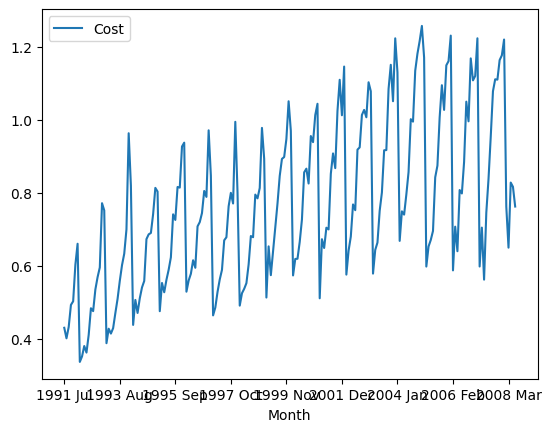

In [4]:
import pandas as pd
from matplotlib import pyplot
df=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
df=df.set_index('Month')
df.plot()
pyplot.show()


In [5]:
df

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2008 Feb,0.761822
2008 Mar,0.649435
2008 Apr,0.827887


In [9]:
#1)Testing for Stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.696756
p-value: 0.432785
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


<Axes: xlabel='Month'>

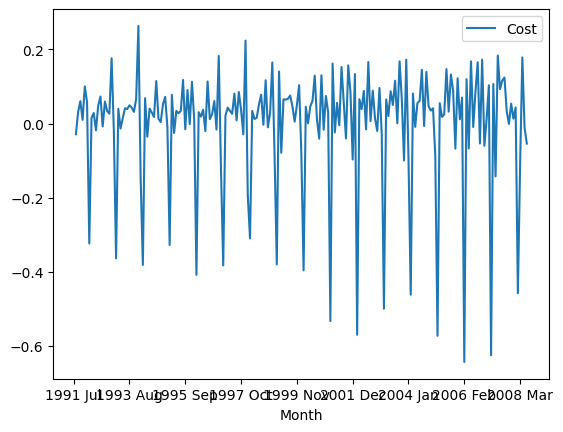

In [10]:
#Taking difference for testing stationarity
df1 = df-df.shift(1)
df1.plot()

<Axes: xlabel='Month'>

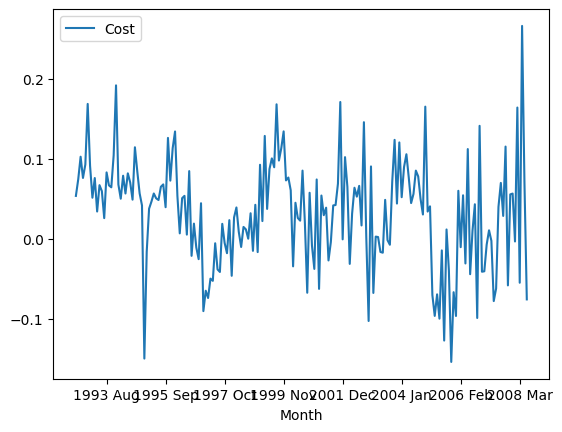

In [11]:
#Taking seasonal difference for testing stationarity
df_n = df-df.shift(12)
df_n.plot()

In [12]:
#2) Stationarity of difference
from statsmodels.tsa.stattools import adfuller
result = adfuller(df1['Cost'][1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.365938
p-value: 0.012176
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


In [13]:
#2) Stationarity of seasonal difference
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_n['Cost'][12:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.368644
p-value: 0.012075
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


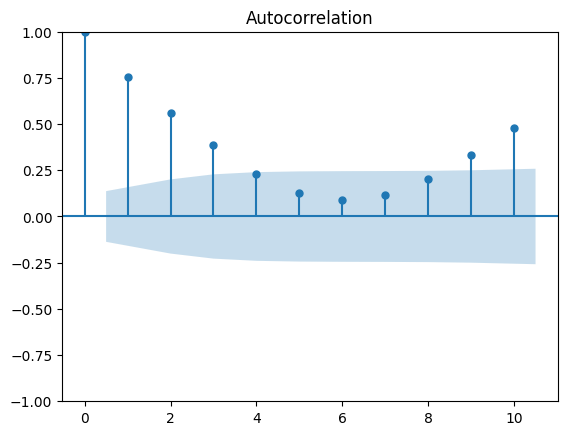

In [14]:
#3) ACF and PACF plots
import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt

fig = tsaplots.plot_acf(df, lags=10)
plt.show()

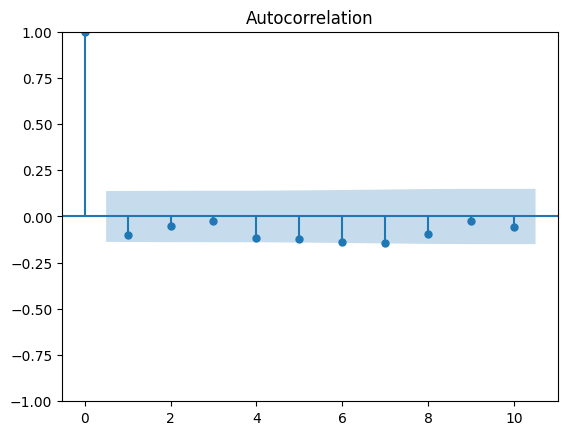

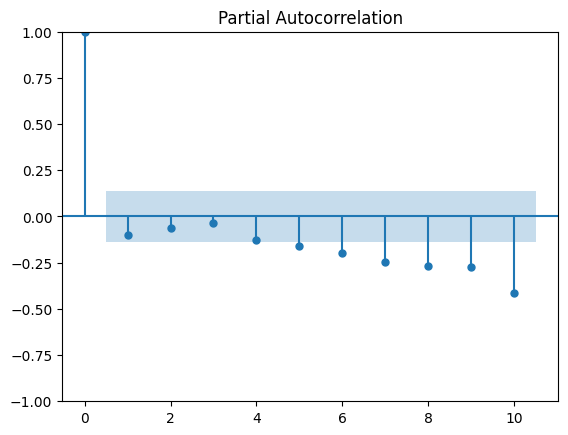

In [15]:
import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt

fig = tsaplots.plot_acf(df1[1:], lags=10)
plt.show()

fig = tsaplots.plot_pacf(df1[1:], lags=10)
plt.show()

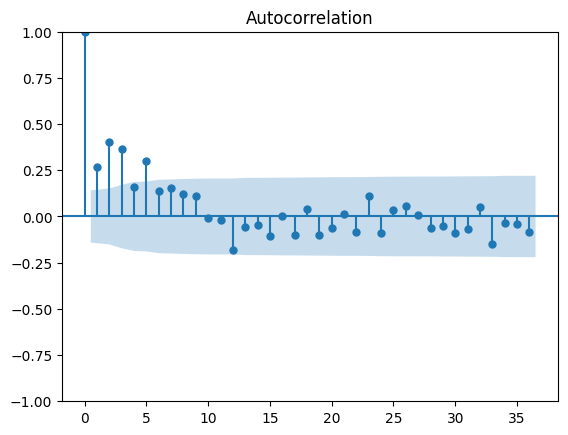

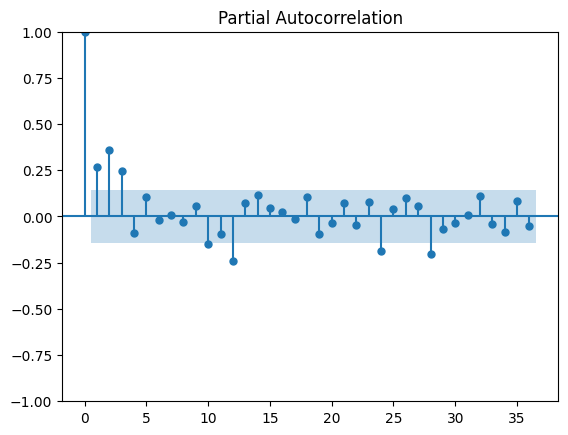

In [16]:

import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt

fig = tsaplots.plot_acf(df_n[12:], lags=36)
plt.show()

fig = tsaplots.plot_pacf(df_n[12:], lags=36)
plt.show()

In [17]:
#4)Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criteri metric.
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df['Cost'],order=(1,1,1), seasonal_order=(0,1,0,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                Cost   No. Observations:                  204
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                 264.817
Date:                             Sun, 12 May 2024   AIC                           -523.634
Time:                                     18:14:37   BIC                           -513.878
Sample:                                 07-01-1991   HQIC                          -519.682
                                      - 06-01-2008                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2800      0.074     -3.777      0.000      -0.425      -0.135
ma.L1         -0.5769      0.069     -8.321      0.000      -0.713      -0.441
sigma2         0.0036      0.000     12.859      0.000       0.003       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                18.83
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df['Cost'],order=(0,1,1), seasonal_order=(0,1,0,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                Cost   No. Observations:                  204
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 261.421
Date:                             Sun, 12 May 2024   AIC                           -518.842
Time:                                     18:14:48   BIC                           -512.338
Sample:                                 07-01-1991   HQIC                          -516.207
                                      - 06-01-2008                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7402      0.051    -14.585      0.000      -0.840      -0.641
sigma2         0.0038      0.000     12.882      0.000       0.003       0.004
===================================================================================
Ljung-Box (L1) (Q):                   2.79   Jarque-Bera (JB):                17.46
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               2.46   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
#5)Split data into train and test. For the test data, use last 12 months observation.
train=df[:-12]
test=df[-12:]
test

,Cost
Month,
2007 Jul,0.954144
2007 Aug,1.078219
2007 Sep,1.110982
2007 Oct,1.109979
2007 Nov,1.163534
2007 Dec,1.176589
2008 Jan,1.219941
2008 Feb,0.761822
2008 Mar,0.649435


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


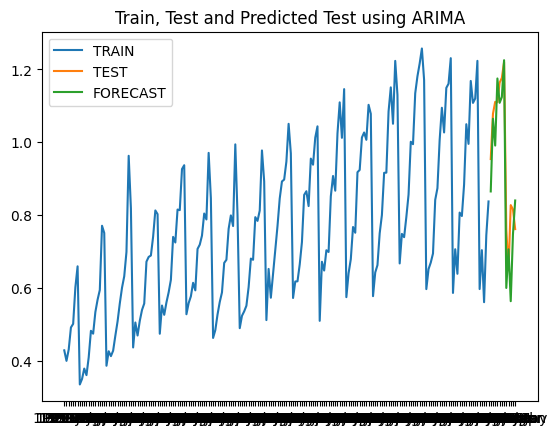

In [20]:
#6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error)
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['Cost'],order=(1,1,0), seasonal_order=(0,1,0,12))
model_fit=model.fit()
test_prediction = model_fit.forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']

plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using ARIMA');

Text(0.5, 1.0, 'Test and Predicted Test using ARIMA')

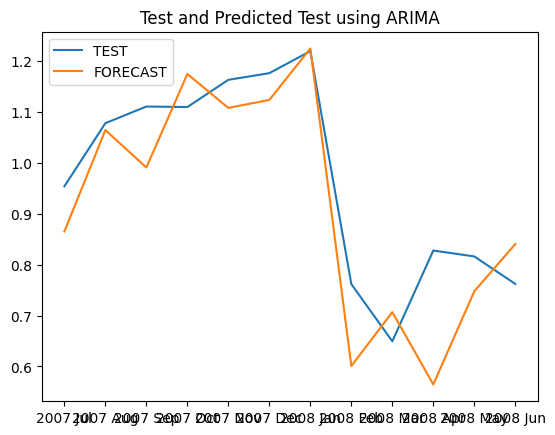

In [21]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using ARIMA')

In [22]:
test_prediction.columns=['Forecast']
test_prediction

,Forecast
Month,
2007 Jul,0.865346
2007 Aug,1.064692
2007 Sep,0.991125
2007 Oct,1.174996
2007 Nov,1.108244
2007 Dec,1.124032
2008 Jan,1.225120
2008 Feb,0.600811
2008 Mar,0.706731


In [23]:
test_prediction['Cost']=test['Cost'].values
test_prediction

,Forecast,Cost
Month,,
2007 Jul,0.865346,0.954144
2007 Aug,1.064692,1.078219
2007 Sep,0.991125,1.110982
2007 Oct,1.174996,1.109979
2007 Nov,1.108244,1.163534
2007 Dec,1.124032,1.176589
2008 Jan,1.225120,1.219941
2008 Feb,0.600811,0.761822
2008 Mar,0.706731,0.649435


In [24]:
import numpy as np
def mae(y_hat, y_true):
    return np.mean(np.abs(y_hat - y_true))
def mape(y_hat, y_true):
    return np.mean(np.abs((y_hat - y_true) / y_true)) * 100
def mse(y_hat, y_true):
    return np.mean((y_hat - y_true) ** 2)

y_true = test_prediction['Cost'].values
arima_preds = test_prediction['Forecast'].values

print('ARIMA MAE: %0.3f' % mae(arima_preds, y_true))
print('ARIMA MAPE: %0.3f%%' % mape(arima_preds, y_true))
print('ARIMA MSE: %0.3f' % mse(arima_preds, y_true))


ARIMA MAE: 0.086
ARIMA MAPE: 9.775%
ARIMA MSE: 0.012


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


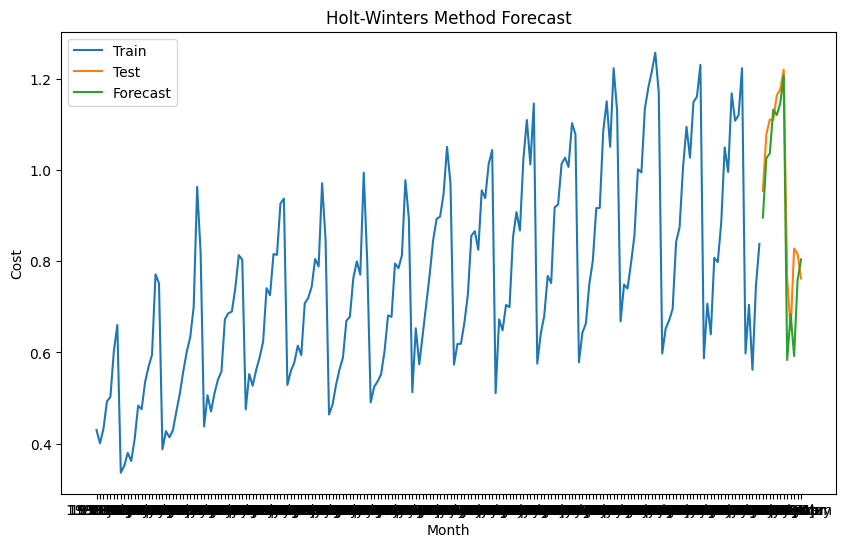

MAE: 0.07023303530797984
MAPE: 8.073364363154132
MSE: 0.00907855551734412


In [25]:
#7) Which model is suitable for Holt Winters' method (Multiplicative or Additive).
#Briefly explain why? Plot test, train and forecast values for the Holt Winters' method.
#Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Train the Holt-Winters' method
model = ExponentialSmoothing(train['Cost'], seasonal='additive', seasonal_periods=12)
hw_model = model.fit()

# Make predictions
forecast = hw_model.forecast(len(test))

# Plot the train, test, and forecast values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Cost'], label='Train')
plt.plot(test.index, test['Cost'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('Holt-Winters Method Forecast')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.show()

# Calculate performance metrics
y_true = test['Cost'].values
y_pred = forecast.values

mae = np.mean(np.abs(y_pred - y_true))
mape = np.mean(np.abs((y_pred - y_true) / y_true)) * 100
mse = np.mean((y_pred - y_true) ** 2)

print('MAE:', mae)
print('MAPE:', mape)
print('MSE:', mse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


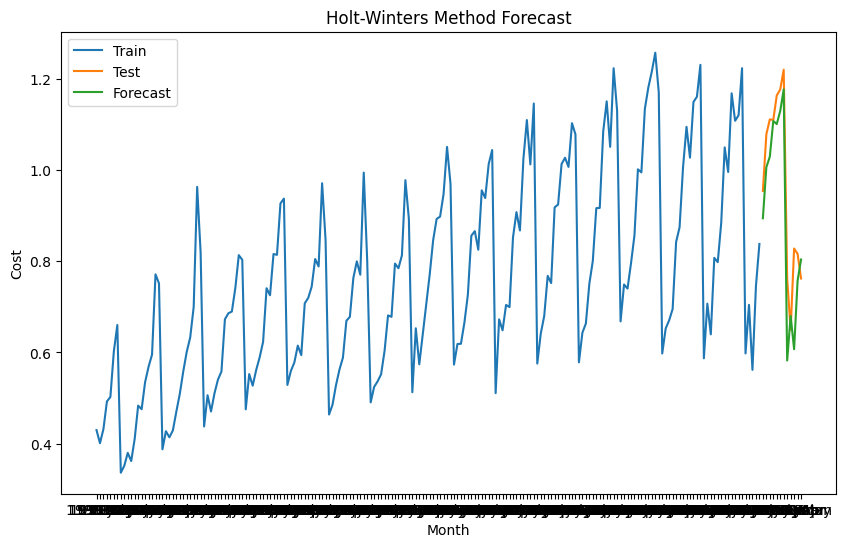

MAE: 0.07507276877874457
MAPE: 8.427231261540769
MSE: 0.009223005255865484


In [26]:
#7) Which model is suitable for Holt Winters' method (Multiplicative or Additive).
#Briefly explain why? Plot test, train and forecast values for the Holt Winters' method.
#Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Train the Holt-Winters' method
model = ExponentialSmoothing(train['Cost'], seasonal='multiplicative', seasonal_periods=12)
hw_model = model.fit()

# Make predictions
forecast = hw_model.forecast(len(test))

# Plot the train, test, and forecast values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Cost'], label='Train')
plt.plot(test.index, test['Cost'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('Holt-Winters Method Forecast')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.show()

# Calculate performance metrics
y_true = test['Cost'].values
y_pred = forecast.values

mae = np.mean(np.abs(y_pred - y_true))
mape = np.mean(np.abs((y_pred - y_true) / y_true)) * 100
mse = np.mean((y_pred - y_true) ** 2)

print('MAE:', mae)
print('MAPE:', mape)
print('MSE:', mse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


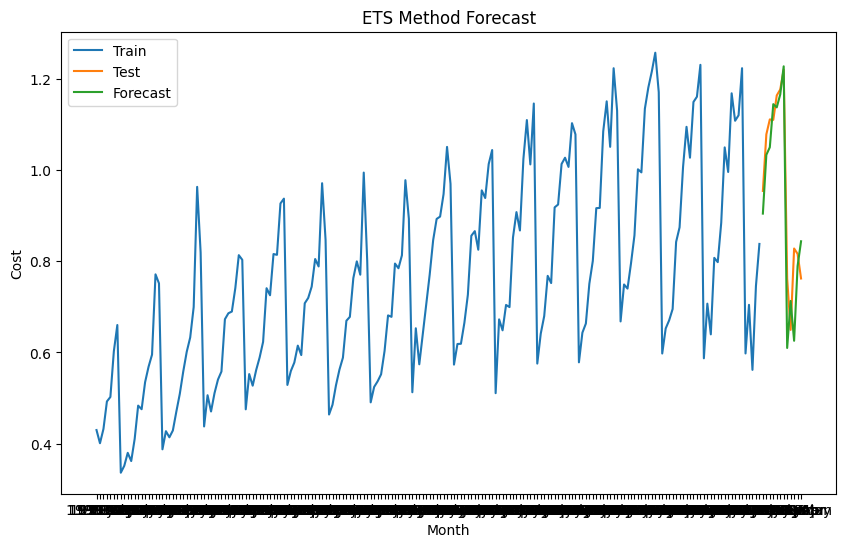

MAE: 0.06342259958610598
MAPE: 7.494821834098765
MSE: 0.007144180936718845


In [27]:
#8) Which model is suitable for ETS method (Multiplicative or Additive for seasonal, trend and error companent.
#Do we have dampened model or not. ).Briefly explain why?
#Plot test, train and forecast values for the ETS method.
#Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import matplotlib.pyplot as plt

# Train the ETS model
model = ExponentialSmoothing(train['Cost'], seasonal='additive', trend='additive', seasonal_periods=12, damped_trend=False)
ets_model = model.fit()

# Make predictions
forecast = ets_model.forecast(len(test))

# Plot the train, test, and forecast values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Cost'], label='Train')
plt.plot(test.index, test['Cost'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('ETS Method Forecast')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.show()

# Calculate performance metrics
y_true = test['Cost'].values
y_pred = forecast.values

mae = np.mean(np.abs(y_pred - y_true))
mape = np.mean(np.abs((y_pred - y_true) / y_true)) * 100
mse = np.mean((y_pred - y_true) ** 2)

print('MAE:', mae)
print('MAPE:', mape)
print('MSE:', mse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


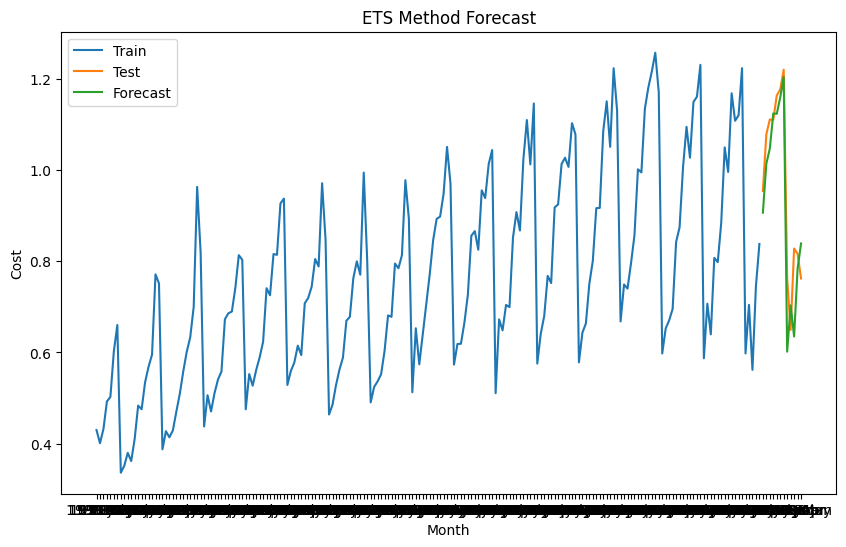

MAE: 0.06500141347425546
MAPE: 7.576708545735435
MSE: 0.007136805144689983


In [28]:
#8) Which model is suitable for ETS method (Multiplicative or Additive for seasonal, trend and error companent.
#Do we have dampened model or not. ).Briefly explain why?
#Plot test, train and forecast values for the ETS method.
#Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import matplotlib.pyplot as plt

# Train the ETS model
model = ExponentialSmoothing(train['Cost'], seasonal='multiplicative', trend='additive', seasonal_periods=12, damped_trend=False)
ets_model = model.fit()

# Make predictions
forecast = ets_model.forecast(len(test))

# Plot the train, test, and forecast values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Cost'], label='Train')
plt.plot(test.index, test['Cost'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('ETS Method Forecast')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.show()

# Calculate performance metrics
y_true = test['Cost'].values
y_pred = forecast.values

mae = np.mean(np.abs(y_pred - y_true))
mape = np.mean(np.abs((y_pred - y_true) / y_true)) * 100
mse = np.mean((y_pred - y_true) ** 2)

print('MAE:', mae)
print('MAPE:', mape)
print('MSE:', mse)


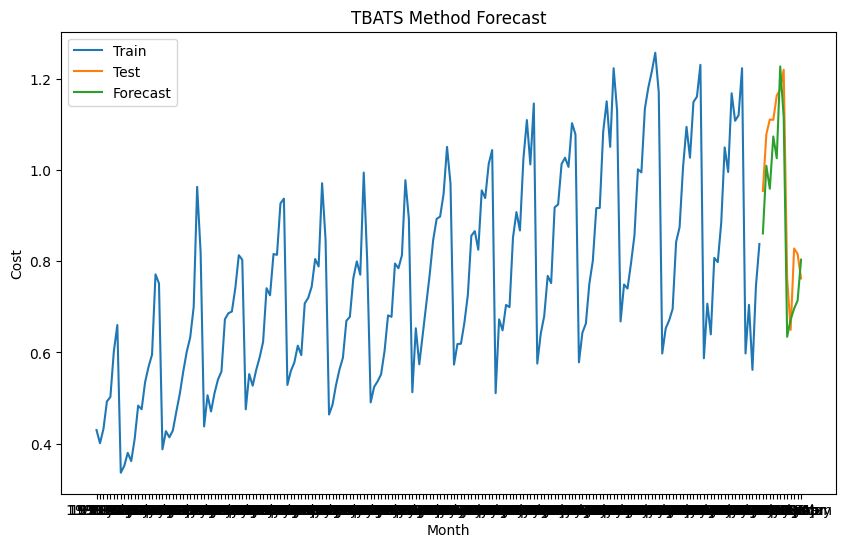

MAE: 0.0891266895364744
MAPE: 9.334577263740044
MSE: 0.009727447798568252


In [30]:
#9)Use TBATS model in train data. Evaluate performance of the model in test data Plot test, train and forecast values for the TBATS method.
#in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

from tbats import TBATS, BATS
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Train the TBATS model
tbats_model = TBATS(seasonal_periods=[12])
tbats_model_fit = tbats_model.fit(train['Cost'])

# Generate forecasts for the test data
forecast = tbats_model_fit.forecast(steps=len(test))

# Plot the train, test, and forecast values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Cost'], label='Train')
plt.plot(test.index, test['Cost'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('TBATS Method Forecast')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.show()

# Calculate performance metrics
mae = mean_absolute_error(test['Cost'], forecast)
mape = np.mean(np.abs((forecast - test['Cost']) / test['Cost'])) * 100
mse = mean_squared_error(test['Cost'], forecast)

print('MAE:', mae)
print('MAPE:', mape)
print('MSE:', mse)


In [32]:
#10) Which model gives the lowes MAPE score?
# Generate forecasts for each model
forecast_hw = hw_model.forecast(len(test))
forecast_ets = ets_model.forecast(steps=len(test))
forecast_tbats = tbats_model_fit.forecast(steps=len(test))

# Calculate MAPE for each model
mape_hw = np.mean(np.abs((y_pred - y_true) / y_true)) * 100
mape_ets = np.mean(np.abs((y_pred - y_true) / y_true)) * 100
mape_tbats = np.mean(np.abs((forecast - test['Cost']) / test['Cost'])) * 100

# Print MAPE scores
print('MAPE for Holt-Winters:', mape_hw)
print('MAPE for ETS:', mape_ets)
print('MAPE for TBATS:', mape_tbats)

# Compare MAPE scores to identify the model with the lowest value
lowest_mape_model = min(mape_hw, mape_ets, mape_tbats)
if lowest_mape_model == mape_hw:
    print('Holt-Winters has the lowest MAPE.')
elif lowest_mape_model == mape_ets:
    print('ETS has the lowest MAPE.')
else:
    print('TBATS has the lowest MAPE.')


MAPE for Holt-Winters: 7.576708545735435
MAPE for ETS: 7.576708545735435
MAPE for TBATS: 9.334577263740044
Holt-Winters has the lowest MAPE.


Using the above data set
1)Test stationary of the
dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criteri metric.

5)Split data into train and test. For the test data, use last 12 months observation.

6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

7) Which model is suitable for Holt Winters' method (Multiplicative or Additive).Briefly explain why? Plot test, train and forecast values for the Holt Winters' method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

8) Which model is suitable for ETS method (Multiplicative or Additive for seasonal, trend and error companent. Do we have dampened model or not. ).Briefly explain why? Plot test, train and forecast values for the ETS method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

9) Use TBATS model in train data.  Evaluate performance of the model in test data Plot test, train and forecast values for the TBATS  method. in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

10) Which model gives the lowes MAPE score?